### This notebook is the initial EDA performed on the telecom churn data set

In [94]:
# Imports
import pandas as pd
import seaborn as sns
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Set options
pd.set_option('display.max_columns', None)
%matplotlib inline

In [98]:
# Load Telecom Churn csv as tc
tc = pd.read_csv('../data/raw/telecom_churn.csv')
tc.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [145]:
print('Shape of DataFrame:', tc.shape)
tc.info()

Shape of DataFrame: (3333, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charg

In [147]:
# Number of unique states
print('Number of states:', len(tc.state.unique()))
tc.state.unique()

Number of states: 51


array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [100]:
# Number of unique area codes
tc['area code'].unique()

array([415, 408, 510])

Are codes:  
    415, North West of San Fransico Bay  
    408, South East of San Fransico Bay  
    510, East of San Fransico Bay  
  
All area codes are in the San Fransico Bay area, but the states cover all 50 states and the District of Columbia.

In [119]:
# Count area codes by state to get a an idea of the distribution
area_codes = tc[['state', 'area code']].copy()
area_codes['area_code_count'] = 1
area_codes = area_codes.groupby(['state', 'area code'], as_index=False).count()
area_codes.head()

,state,area code,area_code_count
0,AK,408,14
1,AK,415,24
2,AK,510,14
3,AL,408,25
4,AL,415,40


<BarContainer object of 51 artists>

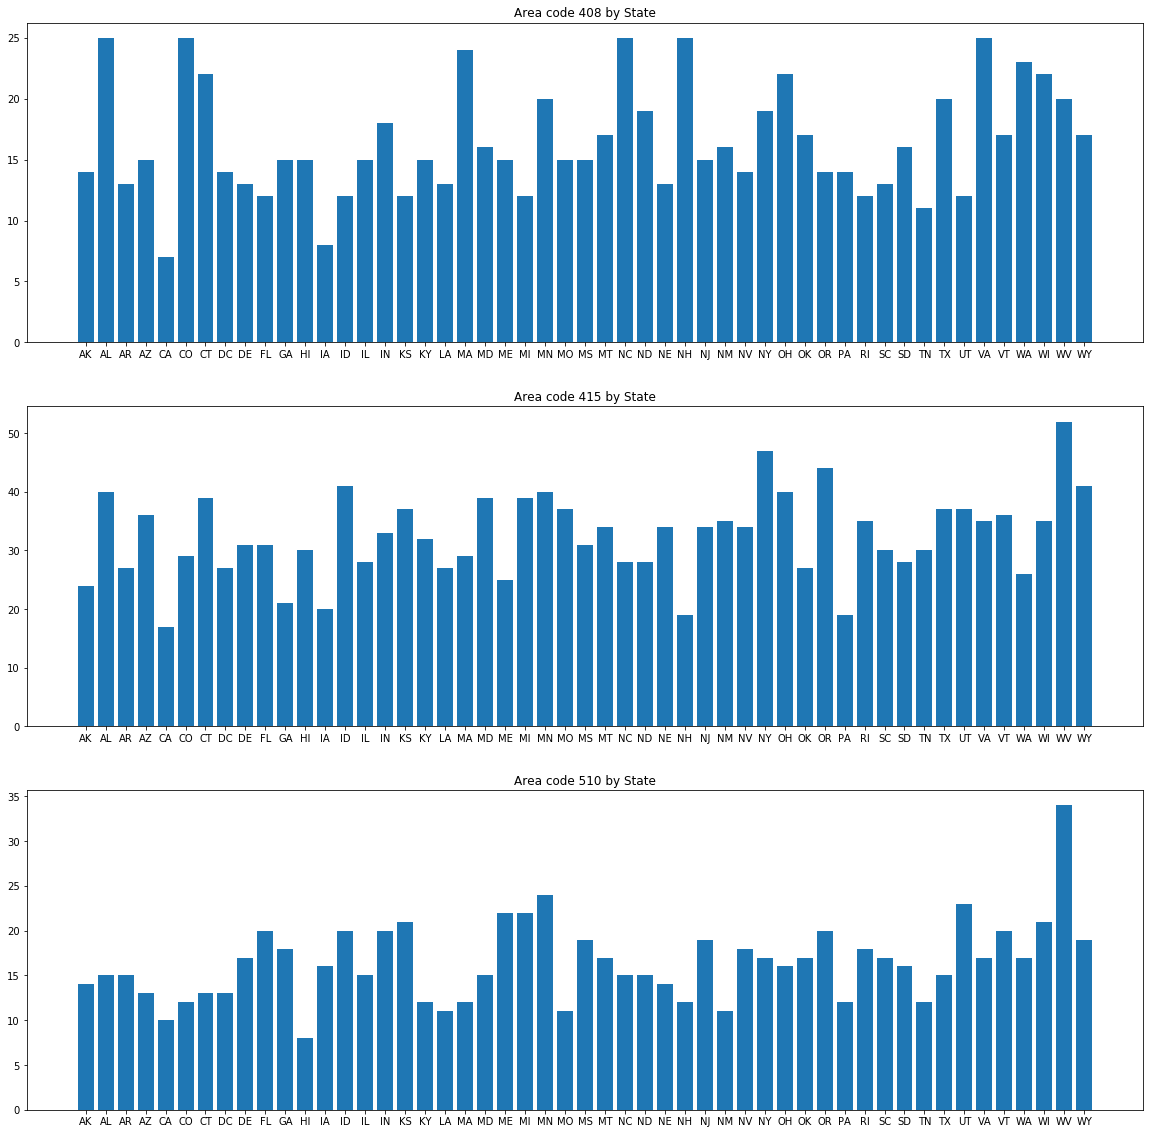

In [143]:
four08 = area_codes[area_codes['area code'] == 408]
four15 = area_codes[area_codes['area code'] == 415]
five10 = area_codes[area_codes['area code'] == 510]

plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 1)
plt.title('Area code 408 by State')
plt.bar(four08.state, four08.area_code_count)


plt.subplot(3, 1, 2)
plt.title('Area code 415 by State')
plt.bar(four15.state, four15.area_code_count)


plt.subplot(3, 1, 3)
plt.title('Area code 510 by State')
plt.bar(five10.state, five10.area_code_count)


In [101]:
# Break up the phone numbers into parts to look for patterns in the prefixes
tc[['phone_prefix','phone_l4']] = tc['phone number'].str.split('-', n=1, expand=True)
tc.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,phone_prefix,phone_l4
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,382,4657
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False,371,7191


In [107]:
# Find the number of unique prefixes
print('Number of prefixes:', len(tc.phone_prefix.unique()))
tc.phone_prefix.unique()

Number of prefixes: 96


array(['382', '371', '358', '375', '330', '391', '355', '329', '335',
       '344', '363', '394', '366', '351', '350', '386', '356', '373',
       '396', '393', '343', '331', '357', '418', '353', '410', '416',
       '370', '383', '360', '395', '362', '341', '402', '332', '372',
       '390', '352', '364', '398', '405', '413', '420', '349', '404',
       '340', '403', '359', '365', '338', '374', '415', '399', '333',
       '354', '419', '411', '388', '412', '346', '400', '334', '387',
       '327', '379', '347', '401', '397', '409', '337', '407', '328',
       '369', '408', '414', '345', '422', '381', '380', '336', '417',
       '406', '361', '377', '385', '378', '367', '339', '348', '342',
       '389', '368', '384', '376', '421', '392'], dtype=object)

In [103]:
# Create a new dataframe to explore phone prefixes
prefixes = pd.DataFrame(index=sorted(tc.state.unique()), columns=sorted(tc.phone_prefix.unique()))
prefixes = prefixes.fillna(0)

In [104]:
# Increment the state / prefix value each time it occurs
for index, row in tc.iterrows():
    prefixes.at[row['state'], row['phone_prefix']] += 1

In [105]:
# Sum up the prefixes for each state
prefixes['sum'] = 0
for index, row in prefixes.iterrows():
    prefixes.at[index, 'sum'] = prefixes.loc[index].sum()

<BarContainer object of 51 artists>

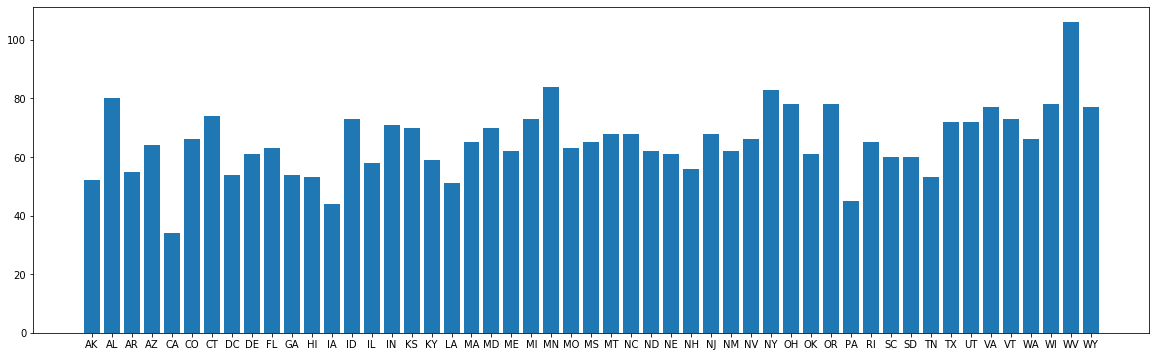

In [106]:
plt.figure(figsize=(20,6))
plt.bar(prefixes.index, prefixes['sum'])

The distribution of phone numbers doesn't seem realistic. The area codes are California, but prefixes.